## Project 01

cpu


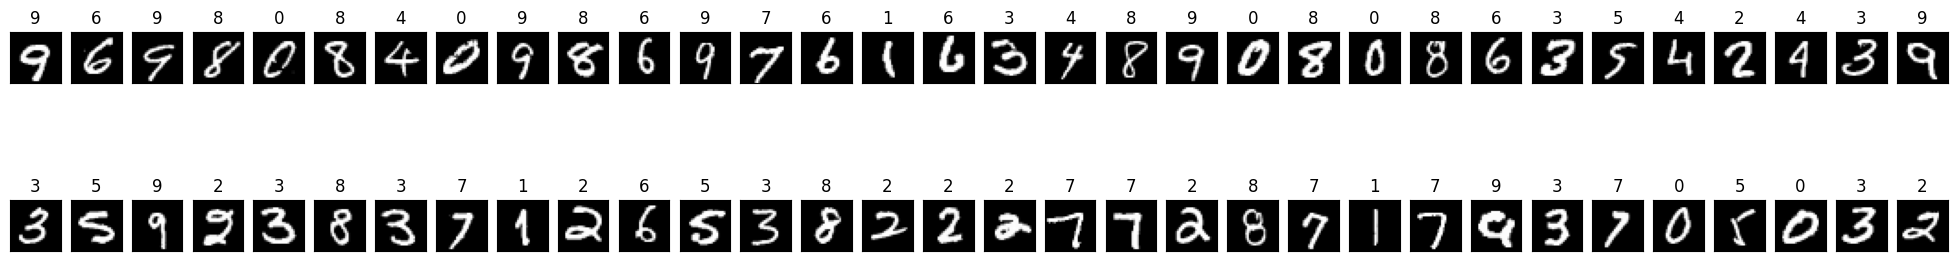

In [12]:
import math
import torch
import torchvision
from torchvision import transforms

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='D:\Mamad\S.B.UK.AC.IR\Docs\M.Eng.in.ST\Courses\Deep.Learning\HomeWorks\HW03\data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='D:\Mamad\S.B.UK.AC.IR\Docs\M.Eng.in.ST\Courses\Deep.Learning\HomeWorks\HW03\data', train=False, transform=transform, download=True)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Display a batch of images
import matplotlib.pyplot as plt
import numpy as np

# Obtain a batch of images
dataiter = iter(train_loader)
images, labels = dataiter.__next__()

# Plot the images in the batch
fig = plt.figure(figsize=(25, 4))
cols = 64 // 2
for idx in np.arange(64):
    ax = fig.add_subplot(2, cols, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].squeeze(), cmap='gray')
    ax.set_title(str(labels[idx].item()))

## Check to See if CUDA Available or Not

In [13]:
# Place the model on the GPU (if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(device))
else:
    print(device)

cpu


## Variable for Ploting

In [14]:
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []
test_loss_list = []
test_acc_list = []

## Import the necessary modules

In [9]:
# Import the necessary modules
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os


## Define the model class MNISTModel

In [11]:
# Define the model class
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        # Define the convolutional layers
        #
        self.conv1 = nn.Conv2d(1, 32, 3, 2, 1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        #
        self.conv3 = nn.Conv2d(32, 64, 1, 1, 1) 
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        
        self.conv4 = nn.Conv2d(64, 64, 3, 2, 1)
        self.bn4 = nn.BatchNorm2d(64)
        self.relu4 = nn.ReLU()
        #
        self.conv5 = nn.Conv2d(64, 128, 1, 1, 1) 
        self.bn5 = nn.BatchNorm2d(128)
        self.relu5 = nn.ReLU()
        
        self.conv6 = nn.Conv2d(128, 128, 3, 1, 1)
        self.bn6 = nn.BatchNorm2d(128)
        self.relu6 = nn.ReLU()
        
        self.conv7 = nn.Conv2d(128, 128, 1, 1, 1)
        self.bn7 = nn.BatchNorm2d(128)
        self.relu7 = nn.ReLU()
        
        self.conv8 = nn.Conv2d(128, 128, 3, 2, 1)
        self.bn8 = nn.BatchNorm2d(128)
        self.relu8 = nn.ReLU()
        #
        self.conv9 = nn.Conv2d(128, 256, 1, 1, 1) 
        self.bn9 = nn.BatchNorm2d(256)
        self.relu9 = nn.ReLU()
        
        self.conv10 = nn.Conv2d(256, 256, 3, 1, 1)
        self.bn10 = nn.BatchNorm2d(256)
        self.relu10 = nn.ReLU()
        
        self.conv11 = nn.Conv2d(256, 256, 1, 1, 1)
        self.bn11 = nn.BatchNorm2d(256)
        self.relu11 = nn.ReLU()
        
        self.conv12 = nn.Conv2d(256, 256, 3, 1, 1)
        self.bn12 = nn.BatchNorm2d(256)
        self.relu12 = nn.ReLU()
        
        #
        self.conv13 = nn.Conv2d(256, 512, 1, 1, 1) 
        self.bn13 = nn.BatchNorm2d(512)
        self.relu13 = nn.ReLU()
        
        self.conv14 = nn.Conv2d(512, 512, 3, 1, 1)
        self.bn14 = nn.BatchNorm2d(512)
        self.relu14 = nn.ReLU()
        
        self.conv15 = nn.Conv2d(512, 512, 1, 1, 1)
        self.bn15 = nn.BatchNorm2d(512)
        self.relu15 = nn.ReLU()
        
        self.conv16 = nn.Conv2d(512, 512, 3, 2, 1)
        self.bn16 = nn.BatchNorm2d(512)
        self.relu16 = nn.ReLU()
        
        #
        self.conv17 = nn.Conv2d(512, 1024, 1, 1, 1) 
        self.bn17 = nn.BatchNorm2d(1024)
        self.relu17 = nn.ReLU()
        
        self.conv18 = nn.Conv2d(1024, 1024, 3, 1, 1)
        self.bn18 = nn.BatchNorm2d(1024)
        self.relu18 = nn.ReLU()
        
        self.conv19 = nn.Conv2d(1024, 1024, 1, 1, 1)
        self.bn19 = nn.BatchNorm2d(1024)
        self.relu19 = nn.ReLU()
        
        # Define the adaptive average pooling layer
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1)) 
        
        self.fc = nn.Linear(1024, 10) 
        
    def forward(self, x):
        # Pass the input through the convolutional layers
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        
        out = self.conv3(out)
        out = self.bn3(out)
        out = self.relu3(out)
        
        out = self.conv4(out)
        out = self.bn4(out)
        out = self.relu4(out)
        
        out = self.conv5(out)
        out = self.bn5(out)
        out = self.relu5(out)
        
        out = self.conv6(out)
        out = self.bn6(out)
        out = self.relu6(out)
        
        out = self.conv7(out)
        out = self.bn7(out)
        out = self.relu7(out)
        
        out = self.conv8(out)
        out = self.bn8(out)
        out = self.relu8(out)
        
        out = self.conv9(out)
        out = self.bn9(out)
        out = self.relu9(out)
        
        out = self.conv10(out)
        out = self.bn10(out)
        out = self.relu10(out)
        
        out = self.conv11(out)
        out = self.bn11(out)
        out = self.relu11(out)
        
        out = self.conv12(out)
        out = self.bn12(out)
        out = self.relu12(out)
        
        out = self.conv13(out)
        out = self.bn13(out)
        out = self.relu13(out)
        
        out = self.conv14(out)
        out = self.bn14(out)
        out = self.relu14(out)
        
        out = self.conv15(out)
        out = self.bn15(out)
        out = self.relu15(out)
        
        out = self.conv16(out)
        out = self.bn16(out)
        out = self.relu16(out)
        
        out = self.conv17(out)
        out = self.bn17(out)
        out = self.relu17(out)
        
        out = self.conv18(out)
        out = self.bn18(out)
        out = self.relu18(out)
        
        out = self.conv19(out)
        out = self.bn19(out)
        out = self.relu19(out)
        
        # Pass the output through the adaptive average pooling layer
        out = self.avgpool(out)
        # Flatten the output
        out = out.view(out.size(0), -1)
        # Pass the output through the fully connected layer
        out = self.fc(out)
        return out

# Create an instance of the model
model = MNISTModel()

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# send your model weights to the GPU
if torch.cuda.is_available():
    model.cuda()
    print(device)

# Check if CUDA is available
if torch.cuda.is_available():
    # Use the GPU
    device = torch.device("cuda")
    print (device)
else:
    # Use the CPU
    device = torch.device("cpu")
    print (device)


Using cpu device
cpu


## Define the loss function and the optimizer

In [ ]:
# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss() # Cross entropy loss function for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01) # Stochastic gradient descent optimizer with learning rate of 0.01

## Dataset and Data Loader

In [13]:
# Define the file path to save the model
PATH = "D:\Mamad\S.B.UK.AC.IR\Docs\M.Eng.in.ST\Courses\Deep.Learning\HomeWorks\HW03\model.pth"
# PATH = "model.pth"

# Check if the file exists
if os.path.isfile(PATH):
    # Load the saved model state dictionary
    model.load_state_dict(torch.load(PATH))
    print("Loaded model from:", PATH)
else:
    print("No saved model found. Starting with a new model.")

# Define the transforms for pre-processing and data augmentation
transform = transforms.Compose([
    transforms.ToTensor(), # Convert the data into tensor
    transforms.RandomRotation(90), # Rotate the data randomly by 90 degrees
    transforms.Normalize((0.5,), (0.5,)) # Normalize the data with mean 0.5 and std 0.5
])

# Load the MNIST dataset
mnist_data = datasets.MNIST(root='D:\Mamad\S.B.UK.AC.IR\Docs\M.Eng.in.ST\Courses\Deep.Learning\HomeWorks\HW03\data', download=True, transform=transform)

# Split the dataset into train, test and cross validation sets
train_size = int(0.8 * len(mnist_data)) # 80% of the data for training
test_size = int(0.1 * len(mnist_data)) # 10% of the data for testing
val_size = len(mnist_data) - train_size - test_size # 10% of the data for cross validation
train_data, test_data, val_data = torch.utils.data.random_split(mnist_data, [train_size, test_size, val_size])

# Create data loaders for the train, validation and test sets
train_loader = DataLoader(train_data, batch_size=128, shuffle=True) # Batch size of 64 and shuffle the data
val_loader = DataLoader(val_data, batch_size=128, shuffle=False) # Batch size of 64 and do not shuffle the data
test_loader = DataLoader(test_data, batch_size=128, shuffle=False) # Batch size of 64 and do not shuffle the data


Loaded model from: D:\Mamad\S.B.UK.AC.IR\Docs\M.Eng.in.ST\Courses\Deep.Learning\HomeWorks\HW03\model.pth


## Training The Model on the Train set and Cross-Validation set

In [18]:
# Define the number of epochs
epochs = 1

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []
test_loss_list = []
test_acc_list = []

train_loss_list = [0] * epochs
train_acc_list = [0] * epochs

val_loss_list = [0] * epochs
val_acc_list = [0] * epochs

test_loss_list = [0] * epochs
test_acc_list = [0] * epochs

# Write a loop to iterate over the data and update the model parameters
for epoch in range(epochs):
    # Set the model to training mode
    model.train()
    # Initialize the training loss and accuracy
    train_loss = 0.0
    train_acc = 0.0
    # Loop over the training batches
    for images, labels in train_loader:
        # Move the data to the device (CPU or GPU)
        images = images.to(device)
        labels = labels.to(device)
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(images)
        # Calculate the loss
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        # Update the training loss and accuracy
        train_loss += loss.item()
        train_acc += (outputs.argmax(dim=1) == labels).sum().item()
    # Calculate the average training loss and accuracy per epoch
    train_loss = train_loss / len(train_loader)
    train_acc = train_acc / len(train_data)
    # Add values to respective lists
    train_loss_list [epoch] = (train_loss)
    train_acc_list [epoch] = (train_acc)
    # Print the training statistics
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {100*train_acc:.4f}%')

    # Set the model to evaluation mode
    model.eval()
    # Initialize the validation loss and accuracy
    val_loss = 0.0
    val_acc = 0.0
    # Loop over the validation batches
    with torch.no_grad(): # No need to track gradients for validation
        for images, labels in val_loader:
            # Move the data to the device (CPU or GPU)
            images = images.to(device)
            labels = labels.to(device)
            # Forward pass
            outputs = model(images)
            # Calculate the loss
            loss = criterion(outputs, labels)
            # Update the validation loss and accuracy
            val_loss += loss.item()
            val_acc += (outputs.argmax(dim=1) == labels).sum().item()
    # Calculate the average validation loss and accuracy per epoch
    val_loss = val_loss / len(val_loader)
    val_acc = val_acc / len(val_data)
    val_loss_list [epoch] = val_loss
    val_acc_list [epoch] = val_acc
    # Print the validation statistics
    print(f'Epoch {epoch+1}, Val Loss: {val_loss:.4f}, Val Accuracy: {100*val_acc:.4f}%')
    # Save model parameters and weights
    torch.save(model.state_dict(), PATH)

## Test the Model on the Test set

In [ ]:
# Set the model to evaluation mode
model.eval()
# Initialize the test loss and accuracy
test_loss = 0.0
test_acc = 0.0
# Loop over the test batches
with torch.no_grad(): # No need to track gradients for testing
    for images, labels in test_loader:
        # Move the data to the device 
        images = images.to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        # Calculate the loss
        loss = criterion(outputs, labels)
        # Update the test loss and accuracy
        test_loss += loss.item()
        test_acc += (outputs.argmax(dim=1) == labels).sum().item()
# Calculate the average test loss and accuracy
test_loss = test_loss / len(test_loader)
test_acc = test_acc / len(test_data)
# Print the test statistics
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {100*test_acc:.4f}%')


## Total number of Parameters

In [ ]:
# Get the total number of parameters
total_params = sum(p.numel() for p in model.parameters())

# Get the total number of trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print the total number and trainable parameters
print(f' Total Params: {total_params:.4f}, Trainable Params: {trainable_params:.4f}') 

## Saving Model

In [28]:
import torch
torch.save(model.state_dict(), "D:\Mamad\S.B.UK.AC.IR\Docs\M.Eng.in.ST\Courses\Deep.Learning\HomeWorks\HW03\model.pth")
# torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Ploting Loss and Accuracy

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Define the number of epochs
epochs = 10

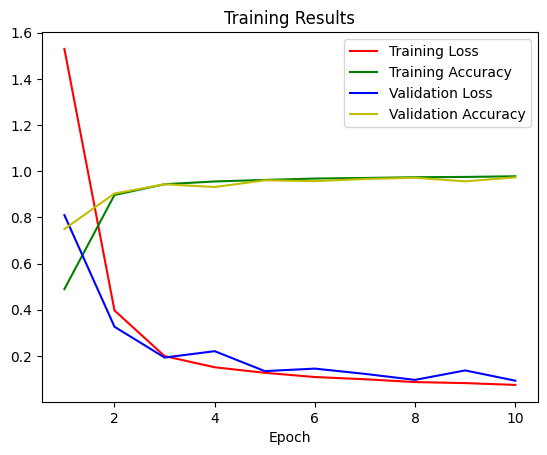

In [12]:
# Plot the results
epochs = range(1, epochs+1)
plt.plot(epochs, train_loss_list, 'r', label='Training Loss')
plt.plot(epochs, train_acc_list, 'g', label='Training Accuracy')
plt.plot(epochs, val_loss_list, 'b', label='Validation Loss')
plt.plot(epochs, val_acc_list, 'y', label='Validation Accuracy')
# plt.plot(test_loss_list, 'c', label='Test Loss')
# plt.plot(test_acc_list, 'm', label='Test Accuracy')
plt.title('Training Results')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Load the Model

In [14]:
model = MNISTModel()
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

## Make a Prediction on the Test set

In [19]:
classes = [
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
]

model.eval()
images, labels = test_data[3][0].unsqueeze(0), test_data[3][1]
with torch.no_grad():
    pred = model(images)
    predicted, actual = classes[pred[0].argmax(0)], classes[labels]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "2", Actual: "2"
